# DATA SCIENCE AND BUSINESS ANALYTICS INTERN at THE SPARKS FOUNDATION 
# GRIP MAY2021

## Author: Mahmud Hasan

## Task 05: Exploratory Data Analysis - Sports

## Objective:
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● Find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

## IMPORTING DATASET

In [2]:
from zipfile import ZipFile
  
file_name = "Indian Premier League.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
deliveries.csv                                 2019-10-01 08:25:20     18235327
matches.csv                                    2019-10-01 08:25:22       140113
Extracting all the files now...
Done!


In [3]:
#importing first dataset
df1=pd.read_csv("matches.csv ")
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df1.shape

(756, 18)

In [5]:
#importing second the dataset
df2=pd.read_csv("deliveries.csv ")
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df2.shape

(179078, 21)

## DATA PREPROCESSING

### Preparing the first dataset

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
#checking null values
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
#deleting unnecesary columns
columns_to_delete=["umpire1","umpire2","umpire3"]
df1.drop(columns_to_delete,axis=1,inplace=True)

In [10]:
#handling missing values
df1[["city","winner","player_of_match"]]=df1[["city","winner","player_of_match"]].fillna("unknown")

In [11]:
#Checking the important names
print(df1['winner'].unique())
print(df1['city'].unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'unknown' 'Rising Pune Supergiants'
 'Delhi Capitals']
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'unknown'
 'Mohali' 'Bengaluru']


In [12]:
# Team "Rising Pune Supergiant" has two names.
df1.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [13]:
#Checking duplicate values
df1.duplicated().sum()

0

### Preparing the second dataset

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [15]:
#checking missing values
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [16]:
#deleting unnecessary columns
columns_to_drop=["player_dismissed","dismissal_kind","fielder"]
df2.drop(columns_to_drop,axis=1,inplace=True)

In [17]:
#Checking the important names
df2.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
# Team "Rising Pune Supergiant" has two names.
df2.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [19]:
#Checking duplicate values
df2.duplicated().sum()

24

In [20]:
#dropping duplicate values
df2.drop_duplicates(inplace=True)

## EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [21]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
#annot_plot(ax,0.2,0.8)

In [22]:
def change_width(ax, new_value) :            #function to change bar width
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#change_width(ax, .35)

In [23]:
print("Total Number of matches in all season: ",df1.id.count())

Total Number of matches in all season:  756


## Number of matches in each season

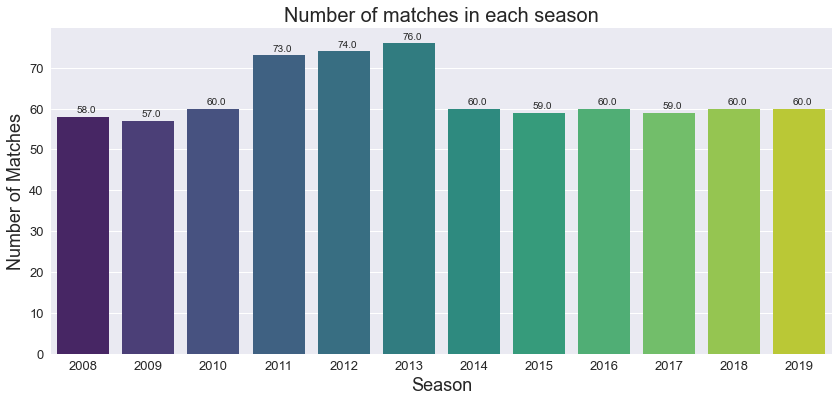

In [24]:
match_by_season=df1.season.value_counts()

#visualizing using a bar chart
plt.figure(figsize=(14,6))
ax=sns.barplot(x=match_by_season.index,y=match_by_season,palette='viridis')
plt.title("Number of matches in each season",fontsize=20)
plt.xlabel("Season",fontsize=18)
plt.ylabel("Number of Matches",fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
annot_plot(ax,0.3,1)
plt.show()

##### Note: The most number of matches,which is 76, held in 2013 .

In [25]:
#result summary
df1.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [26]:
# Duckworth-Lewis methop applied
df1.dl_applied.value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [27]:
#Number of super overs
df2.is_super_over.value_counts()


0    178973
1        81
Name: is_super_over, dtype: int64

### Top Winning Teams

In [28]:
#Number of winning teams
df1.winner.nunique()

15

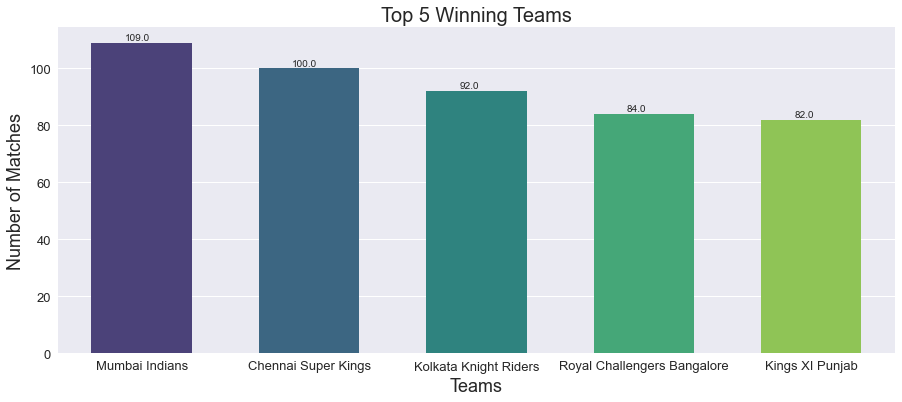

In [29]:
#computing the total winnings in all season by team
top_team=df1.groupby("winner")["id"].count().nlargest(5)

#visualizing using a bar chart
plt.figure(figsize=(15,6))
ax=sns.barplot(x=top_team.index,y=top_team,palette='viridis')
change_width(ax, .6)
plt.title("Top 5 Winning Teams",fontsize=20)
plt.xlabel("Teams",fontsize=18)
plt.ylabel("Number of Matches",fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
annot_plot(ax,0.2,1)
plt.show()

##### Note: Mumbai Indians, which has total 109 winnings, is the most successful team .

## Success rate of match winning

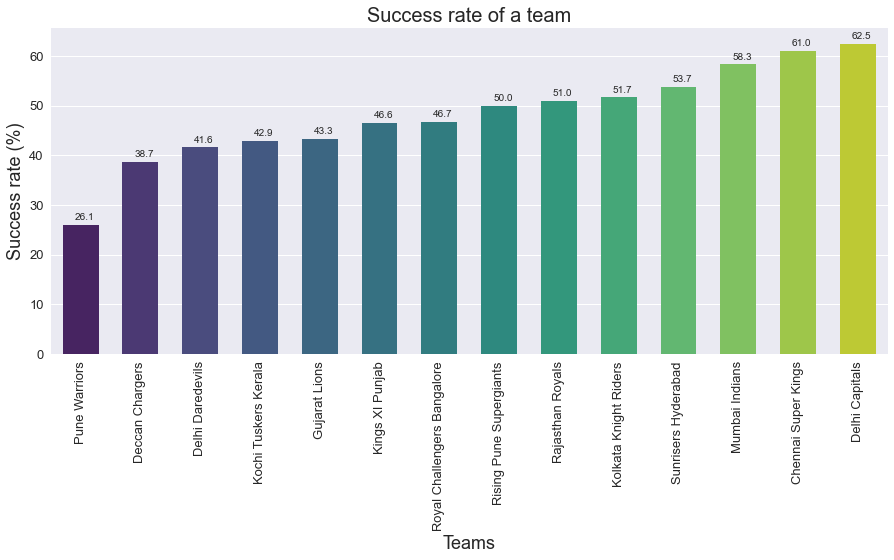

In [47]:
#counting total matches played by a team
matches_played=df1.team1.value_counts()+df1.team2.value_counts()

#counting total matches won by a team
matches_won=df1.winner.value_counts()

success_rate=((matches_won/matches_played)*100).sort_values().drop("unknown")

#visualizing using a bar chart
plt.figure(figsize=(15,6))
ax=sns.barplot(x=success_rate.index,y=success_rate.values,palette='viridis')
change_width(ax, .6)
plt.title("Success rate of a team",fontsize=20)
plt.xlabel("Teams",fontsize=18)
plt.ylabel("Success rate (%)",fontsize=18)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
annot_plot(ax,0.2,1)
plt.show()

#### Note: Delhi Capitals has most success rate which is 62.5%

## Top Scorer Teams 

In [31]:
max_vals=df2.groupby(["match_id","batting_team"])["total_runs"].sum().nlargest(20)
max_vals=[(max_vals.index[i][1],max_vals.values[i]) for i in range(len(max_vals.index))]
team_name=[]
team_score=[]
for i in range(len(max_vals)):
    if max_vals[i][0] not in team_name:
        team_name.append(max_vals[i][0])
        team_score.append(max_vals[i][1])

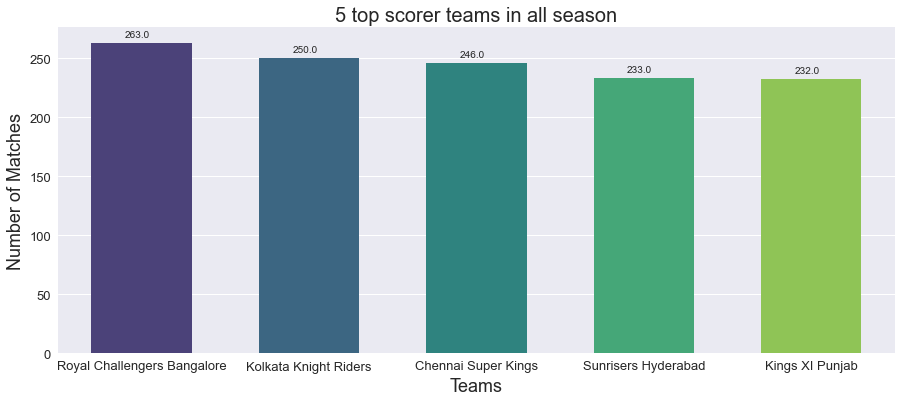

In [32]:
#visualizing using a bar chart
plt.figure(figsize=(15,6))
ax=sns.barplot(x=team_name[:5],y=team_score[:5],palette='viridis')
change_width(ax, .6)
plt.title("5 top scorer teams in all season",fontsize=20)
plt.xlabel("Teams",fontsize=18)
plt.ylabel("Number of Matches",fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
annot_plot(ax,0.2,5)
plt.show()

##### Note: Royal Challengers Bangalore has the maximum score in all seasons.

In [33]:
#The team which won by maximum runs
df1[["id","season","winner","win_by_runs"]].iloc[df1.win_by_runs.idxmax()]

id                         44
season                   2017
winner         Mumbai Indians
win_by_runs               146
Name: 43, dtype: object

In [34]:
#The team which won by maximum wicket
df1[["id","season","winner","win_by_wickets"]].iloc[df1.win_by_wickets.idxmax()]

id                                    3
season                             2017
winner            Kolkata Knight Riders
win_by_wickets                       10
Name: 2, dtype: object

In [35]:
#Maximum extra run given by a team in all seasons
df2.groupby(["match_id","bowling_team"])["extra_runs"].sum().nlargest()

match_id  bowling_team               
64        Deccan Chargers                28
296       Royal Challengers Bangalore    27
101       Royal Challengers Bangalore    26
162       Mumbai Indians                 26
570       Rajasthan Royals               26
Name: extra_runs, dtype: int64

## Top Players

In [36]:
#total player with "Player of match" title
df1.player_of_match.nunique()

227

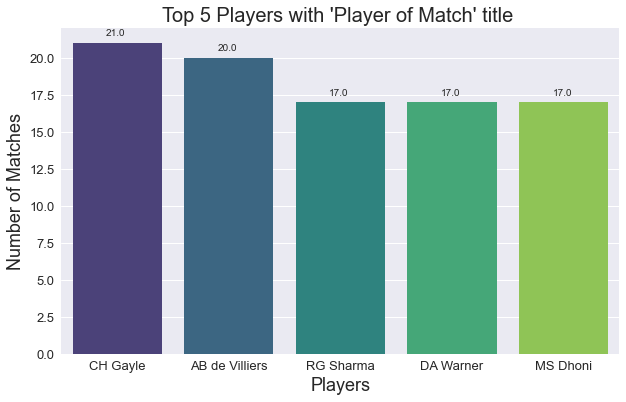

In [37]:
#computing the total number of "player of match" title by players
top_players=df1.player_of_match.value_counts().nlargest()

plt.figure(figsize=(10,6))
ax=sns.barplot(x=top_players.index,y=top_players,palette='viridis')
plt.title("Top 5 Players with 'Player of Match' title ",fontsize=20)
plt.xlabel("Players",fontsize=18)
plt.ylabel("Number of Matches",fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
annot_plot(ax,0.3,0.5)
plt.show()

#### Note: CH Gayle has 21 "Player of The Match" title

## Total scores by batsmen in all seasons

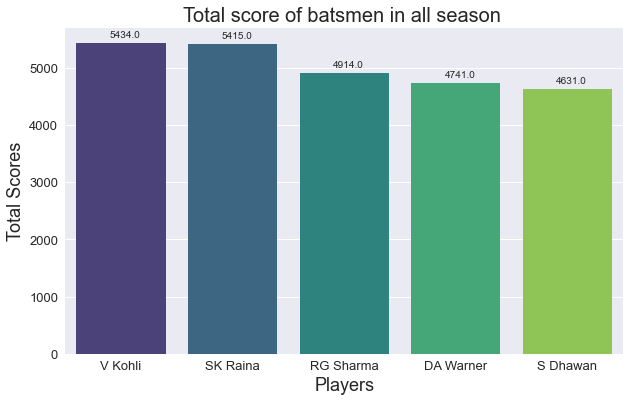

In [38]:
max_scores=df2.groupby("batsman")["batsman_runs"].sum().nlargest()

plt.figure(figsize=(10,6))
ax=sns.barplot(x=max_scores.index,y=max_scores,palette='viridis')
plt.title("Total score of batsmen in all season ",fontsize=20)
plt.xlabel("Players",fontsize=18)
plt.ylabel("Total Scores",fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
annot_plot(ax,0.3,100)
plt.show()

#### Note: V Kohli has the record of maximum total score in all season and the score is 5434 .

## Maximum runs by individual player

In [39]:
max_runs=df2.groupby(["match_id","batsman"])["batsman_runs"].sum().nlargest(10)
max_runs=[(max_runs.index[i][1],max_runs.values[i]) for i in range(len(max_runs.index))]
player_name=[]
player_score=[]
for i in range(len(max_runs)):
    if max_runs[i][0] not in player_name:
        player_name.append(max_runs[i][0])
        player_score.append(max_runs[i][1])

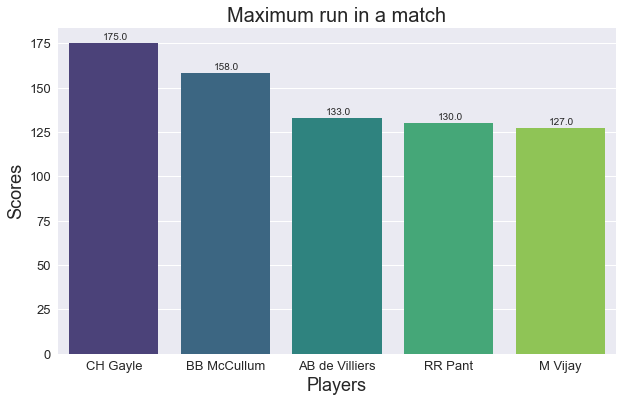

In [40]:
#visualizing using a bar chart
plt.figure(figsize=(10,6))
ax=sns.barplot(x=player_name[:5],y=player_score[:5],palette='viridis')
plt.title("Maximum run in a match",fontsize=20)
plt.xlabel("Players",fontsize=18)
plt.ylabel("Scores",fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
annot_plot(ax,0.3,2)
plt.show()

#### Note: CH Gayle has the record of maximum runs which is 175.

### Top Venues

In [41]:
df1.venue.nunique()

41

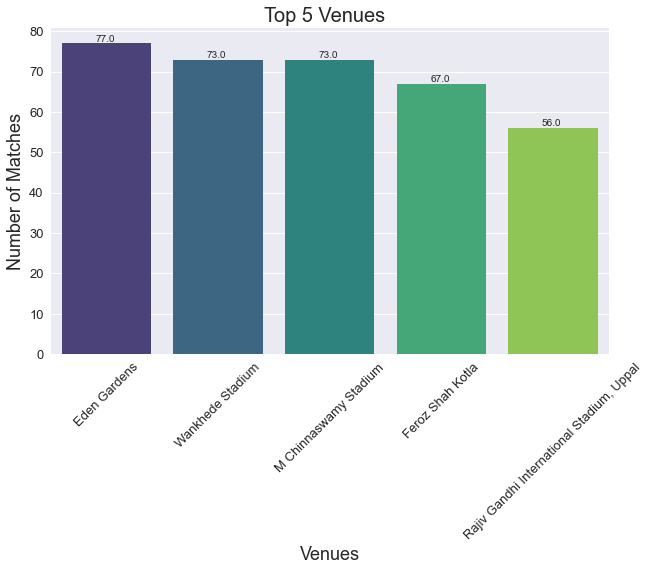

In [42]:
#computing top venues where most of the matches were held
top_venues=df1.venue.value_counts().nlargest()

plt.figure(figsize=(10,6))
ax=sns.barplot(x=top_venues.index,y=top_venues,palette='viridis')
plt.title("Top 5 Venues  ",fontsize=20)
plt.xlabel("Venues",fontsize=18)
plt.ylabel("Number of Matches",fontsize=18)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
annot_plot(ax,0.3,0.5)
plt.show()

#### Eden Gardens is the venue which held most matches.

## CONCLUSION

#### 1. Most Successful Teams: Mumbai Indians and Chennai Super kings.
#### 2. Best Players to bid for: CH Gayle and AB de villiers

## THANK YOU